In [1]:
%pylab inline
import pygadgetreader
import reading_snapshots
import gadget

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)


## Writting Snapshot with only the DM halo particles of a snapshpt of the MW+LMC simulation.  

In [3]:
r_s_sims = 40.85

In [13]:
MW_mass = pygadgetreader.readsnap('../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110', 'mass', 'dm')

Returning DM    Mass


In [13]:
MW_post = reading_snapshots.read_MW_snap_com_coordinates('../../MW_anisotropy/code/test_snaps/', 'MWLMC5_100M_new_b1_110', LMC=True,
                                                                 N_halo_part=100000000, pot=True)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Potential
Loading MW particles and LMC particles


In [73]:
N_random_1e5 = np.random.randint(0, 10**8, 100000)
N_random_1e6 = np.random.randint(0, 10**8, 1000000)
N_random_1e7 = np.random.randint(0, 10**8, 10000000)

In [56]:
ics.pos[:] = MW_post[0]
ics.vel[:] = MW_post[1]
ics.mass[:] = np.ones(100000000)*MW_mass[0]
#ics.ParticleIDs[:] = MW_post[3]
ics.write()

In [68]:
ics = gadget.ICs("MWLMC5_100M_b1_dmhalopart_1e6.hdf5", [0,10**6], verbose=True)
ics.pos[:] = MW_post[0][N_random_1e6]
ics.vel[:] = MW_post[1][N_random_1e6]
ics.mass[:] = np.ones(1000000)*MW_mass[0]
ics.ParticleIDs[:]=np.arange(1, 10**6+1)
ics.write()

In [74]:
ics = gadget.ICs("MWLMC5_100M_b1_dmhalopart_1e7.hdf5", [0,10**7], verbose=True, longids=True)
ics.pos[:] = MW_post[0][N_random_1e7]
ics.vel[:] = MW_post[1][N_random_1e7]
ics.mass[:] = np.ones(10000000)*MW_mass[0]
ics.ParticleIDs[:] = np.arange(1, 10**7+1)
ics.write()

In [75]:
ics = gadget.ICs("MWLMC5_100M_b1_dmhalopart_1e5.hdf5", [0,10**5], verbose=True, longids=True)
ics.pos[:] = MW_post[0][N_random_1e5]
ics.vel[:] = MW_post[1][N_random_1e5]
ics.mass[:] = np.ones(100000)*MW_mass[0]
ics.ParticleIDs[:] = np.arange(1, 10**5+1)
ics.write()

In [57]:
!du -h MWLMC5_100M_b1_dmhalopart.hdf5 

3.4G	MWLMC5_100M_b1_dmhalopart.hdf5


In [4]:
MWLMC_post = reading_snapshots.read_MW_snap_com_coordinates('../../MW_anisotropy/code/test_snaps/',
                                                            'MW2_100M_beta1_vir_017', LMC=False,
                                                             N_halo_part=100000000, pot=True)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Potential


In [9]:
r_mw = (MWLMC_post[0][:,0]**2 + MWLMC_post[0][:,1]**2 + MWLMC_post[0][:,2]**2)**0.5
index_cut = np.where(r_mw < 300)[0]

In [10]:
ics_MW = gadget.ICs("MW_100M_b1_dmhalopart_1e8.hdf5", [0,10**8], verbose=True, longids=True)
ics_MW.pos[:] = MWLMC_post[0]
ics_MW.vel[:] = MWLMC_post[1]
ics_MW.mass[:] = np.ones(10**8)*MW_mass[0]
ics_MW.ParticleIDs[:] = np.arange(1, 10**8+1)
ics_MW.write()

In [7]:
N_random_1e5 = np.random.randint(0, 10**8, 100000)
N_random_1e6 = np.random.randint(0, 10**8, 1000000)
N_random_1e7 = np.random.randint(0, 10**8, 10000000)

In [8]:
def write_snap(pos, vel, mass, lenght_data, name):
    ics_MW = gadget.ICs(name, [0,lenght_data], verbose=True, longids=True)
    ics_MW.pos[:] = pos
    ics_MW.vel[:] = vel
    ics_MW.mass[:] = mass
    ics_MW.ParticleIDs[:] = np.arange(1, lenght_data+1)
    ics_MW.write()
    print('Done Writting Snapshot')
    return 0

In [19]:
write_snap(MWLMC_post[0][N_random_1e7], MWLMC_post[1][N_random_1e7],  np.ones(10**7)*MW_mass[0], 10**7, 'MW_100M_b1_dmhalopart_1e7.hdf5')

Done Writting Snapshot


0

In [11]:
N_random_1e6 = np.random.randint(0, len(index_cut), 1000000)


In [14]:
write_snap(MWLMC_post[0][index_cut][N_random_1e6], MWLMC_post[1][index_cut][N_random_1e6],  np.ones(10**6)*MW_mass[0], 10**6, 'MW_100M_b1_dmhalopart_1e6_tr.hdf5')

Done Writting Snapshot


0

In [21]:
write_snap(MWLMC_post[0][N_random_1e5], MWLMC_post[1][N_random_1e5],  np.ones(10**5)*MW_mass[0], 10**5, 'MW_100M_b1_dmhalopart_1e5.hdf5')

Done Writting Snapshot


0

(-30, 30)

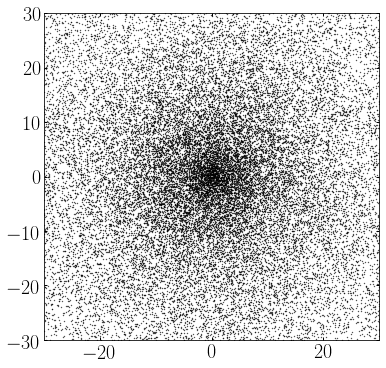

In [29]:
figure(figsize=(6,6))
scatter(MWLMC_post[0][N_random_1e5,0], MWLMC_post[0][N_random_1e5,1], s=0.1, c='k')
xlim(-30, 30)
ylim(-30, 30)

In [44]:
np.savetxt('MW_100M_b1_dm_part_1e8.txt', np.array([MWLMC_post[0][:,0], MWLMC_post[0][:,1], MWLMC_post[0][:,2], MW_mass[0]*np.ones(10**8)]).T)

In [46]:
np.savetxt('MW_100M_b1_dm_part_1e7.txt', np.array([MWLMC_post[0][N_random_1e7,0], MWLMC_post[0][N_random_1e7,1], MWLMC_post[0][N_random_1e7,2], MW_mass[0]*np.ones(10**7)]).T)
np.savetxt('MW_100M_b1_dm_part_1e6.txt', np.array([MWLMC_post[0][N_random_1e6,0], MWLMC_post[0][N_random_1e6,1], MWLMC_post[0][N_random_1e6,2], MW_mass[0]*np.ones(10**6)]).T)
np.savetxt('MW_100M_b1_dm_part_1e5.txt', np.array([MWLMC_post[0][N_random_1e5,0], MWLMC_post[0][N_random_1e5,1], MWLMC_post[0][N_random_1e5,2], MW_mass[0]*np.ones(10**5)]).T)

In [47]:
!ls -tor

total 23450028
-rw-rw-r-- 1 xzk       11247 Mar 24 13:45 MWLMC5_Snlm_20_20_b1.txt
-rw-rw-r-- 1 xzk       11247 Mar 24 13:45 MWLMC5_Snlm_20_20_b1_m0.txt
-rw-rw-r-- 1 xzk       11202 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m04.txt
-rw-rw-r-- 1 xzk       11207 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m03.txt
-rw-rw-r-- 1 xzk       11227 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m02.txt
-rw-rw-r-- 1 xzk       11235 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m01.txt
-rw-rw-r-- 1 xzk       11247 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m00.txt
-rw-rw-r-- 1 xzk       11151 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m10.txt
-rw-rw-r-- 1 xzk       11153 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m09.txt
-rw-rw-r-- 1 xzk       11165 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m08.txt
-rw-rw-r-- 1 xzk       11169 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m07.txt
-rw-rw-r-- 1 xzk       11193 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m06.txt
-rw-rw-r-- 1 xzk       11199 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m05.txt
-rw-rw-r-- 1 xzk       11082 Mar 24 13:46 MWLMC5_Snlm_20_20_b1_m15.